# Proof of concept
Do wykonania tego prototypu wykorzystano ten dataset https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset 

## Cel
Pokazanie metody klasyfikacji i alarmowania o potencjalnych zagrożeiach

In [201]:
!ls
import pandas as pd 

df = pd.read_csv("Medicaldataset.csv")
df.head()

heart.xls  Medicaldataset.csv  Visualization.ipynb


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [202]:
df.count()

Age                         1319
Gender                      1319
Heart rate                  1319
Systolic blood pressure     1319
Diastolic blood pressure    1319
Blood sugar                 1319
CK-MB                       1319
Troponin                    1319
Result                      1319
dtype: int64

In [203]:
df['Result'] = df['Result'].replace({'positive': 1, 'negative': 0})

/tmp/ipykernel_20569/3810045266.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Result'] = df['Result'].replace({'positive': 1, 'negative': 0})


In [204]:
# df = df.drop(['Blood sugar', 'CK-MB', 'Troponin'], axis=1)

In [205]:
import seaborn as sns
df.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.093560,-0.023655,0.018231,0.002812,-0.004007,0.017700,0.088557,0.238002
Gender,-0.093560,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023655,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.018231,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002812,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004007,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.017700,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088557,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Result,0.238002,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


Najbardziej skorelowaną zmienną związaną z rezultatem chorób serca jest wiek. Dlatego rozsądnm jest sądzić, że kryterium wieku jest zasadne przy formułowaniu założeń projektu.

<Axes: xlabel='Age'>

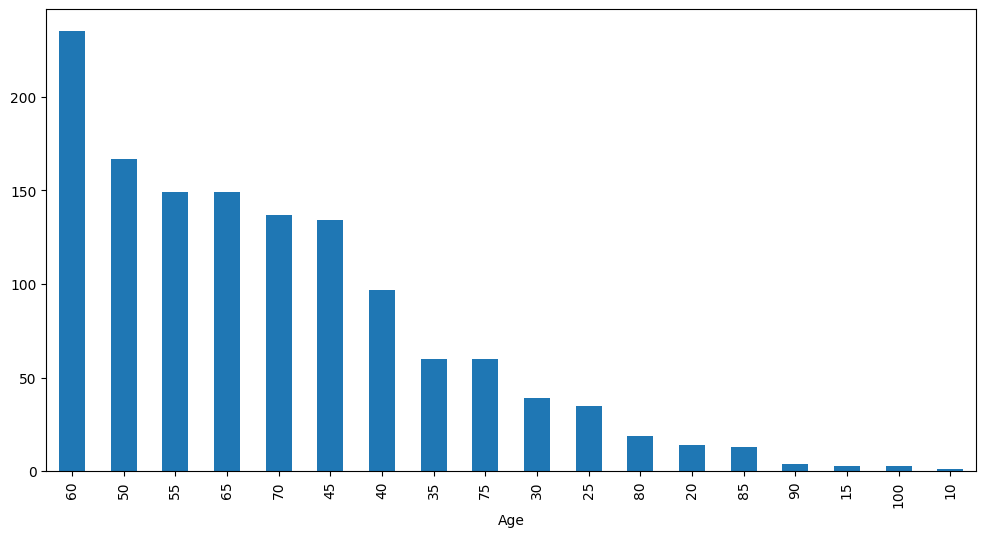

In [206]:
# Create custom groups by aggregating neighboring bars
grouped_age = df['Age'].apply(lambda x: (x // 5) * 5)
grouped_age_counts = grouped_age.value_counts()

# Plot the grouped data
grouped_age_counts.plot(kind="bar", figsize=(12, 6))

In [207]:
age_function = lambda x: x//10
df['AgeGroup'] = df['Age'].apply(age_function)
df.drop(columns = ['Age'], inplace = True)

In [218]:
from sklearn.model_selection import train_test_split 

X = df[['AgeGroup', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Troponin']]
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=104, test_size=0.25, shuffle=True) 

In [219]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [220]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)

accuracy_score(y_test, prediction)

0.8636363636363636

# Wnioski
Posiadajac informacje dostępne na nowoczesnych urządzeniach wearable ponadto korelując je z danymi takimi jak temeratura i satiracja nie obięty